In [1]:
# Make sure the plot shows up
%matplotlib inline

# Import libraries that we need
import pandas as pd
import numpy as np

In [2]:
# Read the data from disk
data = pd.read_csv('sp500.csv', index_col='Date', parse_dates=['Date'])

In [3]:
# Calculate two moving averages
data['SMA50'] = data['SP500'].rolling(50).mean()
data['SMA100'] = data['SP500'].rolling(100).mean()

In [4]:
# Set to 1 if SMA50 is above SMA100
data['Position'] = np.where(data['SMA50'] > data['SMA100'], 1, 0)

In [5]:
# Buy a day delayed, shift the column
data['Position'] = data['Position'].shift()

In [6]:
# Calculate tge daily percent returns of strategy
data['StrategyPct'] = data['SP500'].pct_change(1) * data['Position']

In [7]:
# Calculate cumulative returns
data['Strategy'] = (data['StrategyPct'] + 1).cumprod()

In [8]:
#Calculate index cumulative returns
data['BuyHold'] = (data['SP500'].pct_change(1) + 1).cumprod()

<AxesSubplot:xlabel='Date'>

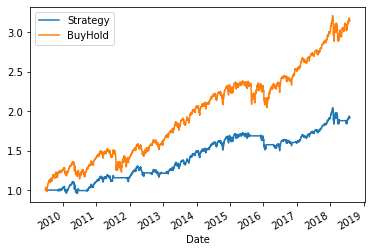

In [9]:
# Plot the result
data[['Strategy', 'BuyHold']].plot()